### Exp 3
### Jay Mehta
### 2018130024

#### (i) Apply Naive bayes classifier for given data see Naive_bayes_handout.zip file in edmodo.

#### (ii) Apply and compare Linear Discriminating Analysis with Naive bayes classifiers w.r.t. error, specificity and sensitivity

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

In [11]:
# tr,ts,vl = pd.read_csv('Train.csv'),pd.read_csv('Test.csv'),pd.read_csv('Valid.csv')
ts = pd.read_csv('Test.csv')
ts.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


## Convert the textual meta-data into a suitable (e.g. corpus) object.

## Triage some of the irrelevant punctuation and other symbols in the corpus  document,change all text to lower case, etc.

In [12]:
ts['text'] = ts['text'].str.strip().str.replace('[^\w\s]','').str.lower()
ts.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,label
0,i always wrote this series off as being a comp...,0
1,1st watched 1272002 3 out of 10dirsteve purce...,0
2,this movie was so poorly written and directed ...,0
3,the most interesting thing about miryang secre...,1
4,when i first read about berlin am meer i didnt...,0


## Tokenize the job descriptions into words. Examine the distributions of two important features

## Classify attributes in two categories

## Graphically visualize the difference between low and high value of targeted feature graph

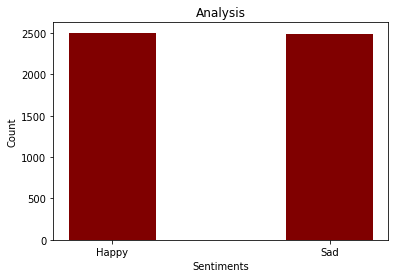

In [13]:
mp = ts['label'].value_counts()
plt.bar(['Happy', 'Sad'], [mp[1],mp[0]], color ='maroon', width = 0.4)
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.title("Analysis")
plt.show()

## Transform the features into categorical data

## Ignore those low frequency words and report the sparsity of your categorical data matrix with or without delete those low frequency words

In [14]:
x = ts['text']
y = ts['label']
x_train,y_train = x[0:3350],y[0:3350]
x_test,y_test = x[3350:],y[3350:]

In [15]:
cv = CountVectorizer(stop_words='english')  
x_train = cv.fit_transform(x_train).toarray()
x_test = cv.transform(x_test).toarray()

## Apply the Naive Bayes Classifier

In [16]:
model = MultinomialNB()
model.fit(x_train,y_train)
score_nb = model.score(x_test,y_test)
score_nb

0.8290909090909091

## Apply and compare LDA and Naive Bayes classifiers with respect to the error, specificity and sensitivity

In [17]:
clf = LDA()
clf.fit_transform(x_train,y_train)
score_lda = clf.score(x_test,y_test)
score_lda

0.7502134841234576

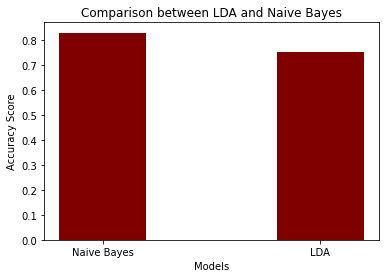

In [18]:
plt.bar(['Naive Bayes', 'LDA'], [score_nb,score_lda], color ='maroon', width = 0.4) 
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison between LDA and Naive Bayes")
plt.show()

## Conclusion

1) Processes such as tokenization, lemmatization, removing stop-words, converting to one single case are crucial to building a good model.

2) The difference observed after applying LDA was found to be very less and I believe the small difference is owing to the heavy data processing performed.

3) Through this experiment, I understood how to process textual data and apply Naive Bayes Algorithm.

4) Also, compared LDA and Naive Bayes Algorithm and understood their advantages and disadvantages.